In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
import torch
import numpy as np

In [13]:
aug = torch.load('../outputs/augmented/epistemic.pt').numpy()
na = torch.load('../outputs/nonaug/epistemic.pt').numpy()

In [14]:
oods = torch.load('../outputs/augmented/oods.pt').numpy()

In [15]:
aug_ood = aug[:, 0, :, :][oods.astype(np.bool_)]
aug_id = aug[:, 0, :, :][~oods.astype(np.bool_)]

na_ood = na[:, 0, :, :][oods.astype(np.bool_)]
na_id = na[:, 0, :, :][~oods.astype(np.bool_)]

Text(0, 0.5, 'Frequency')

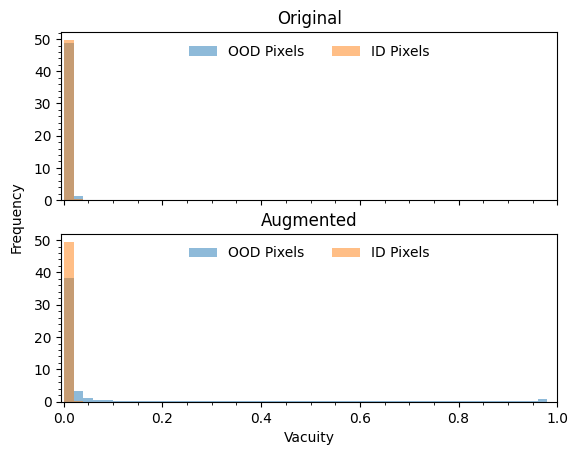

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(na_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), density=True, alpha=.5)
axs[0].hist(na_id.flatten(), bins=50, label="ID Pixels", range=(0, 1), density=True, alpha=.5)
axs[0].set_title("Original")

axs[1].hist(aug_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), density=True, alpha=.5)
axs[1].hist(aug_id.flatten(), bins=50, label="ID Pixels", range=(0, 1), density=True, alpha=.5)
axs[1].set_title("Augmented")

for ax in axs.flatten():
    ax.grid(False)
    ax.set_xlim(-0.005, 1.0)
    ax.legend(loc="upper center", frameon=False, ncol=2)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

a.set_xlabel("Vacuity")
a.set_ylabel("Frequency")
